# Building Music Recommendation System using Spotify Dataset

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Project Initialization & Data Loading

In [2]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [5]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [6]:
print(data.shape)
print(data.columns)
print(data.isnull().sum())
data.head()


(170653, 19)
Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [7]:
genre_data

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [8]:
year_data

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


# Pre-Data Preprocessing & Cleaning

In [9]:
data = data.drop_duplicates()
data = data.drop(columns=['id', 'Unnamed: 0'], errors='ignore')

# Normalize numerical features
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [10]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## Numerical Feature Distributions

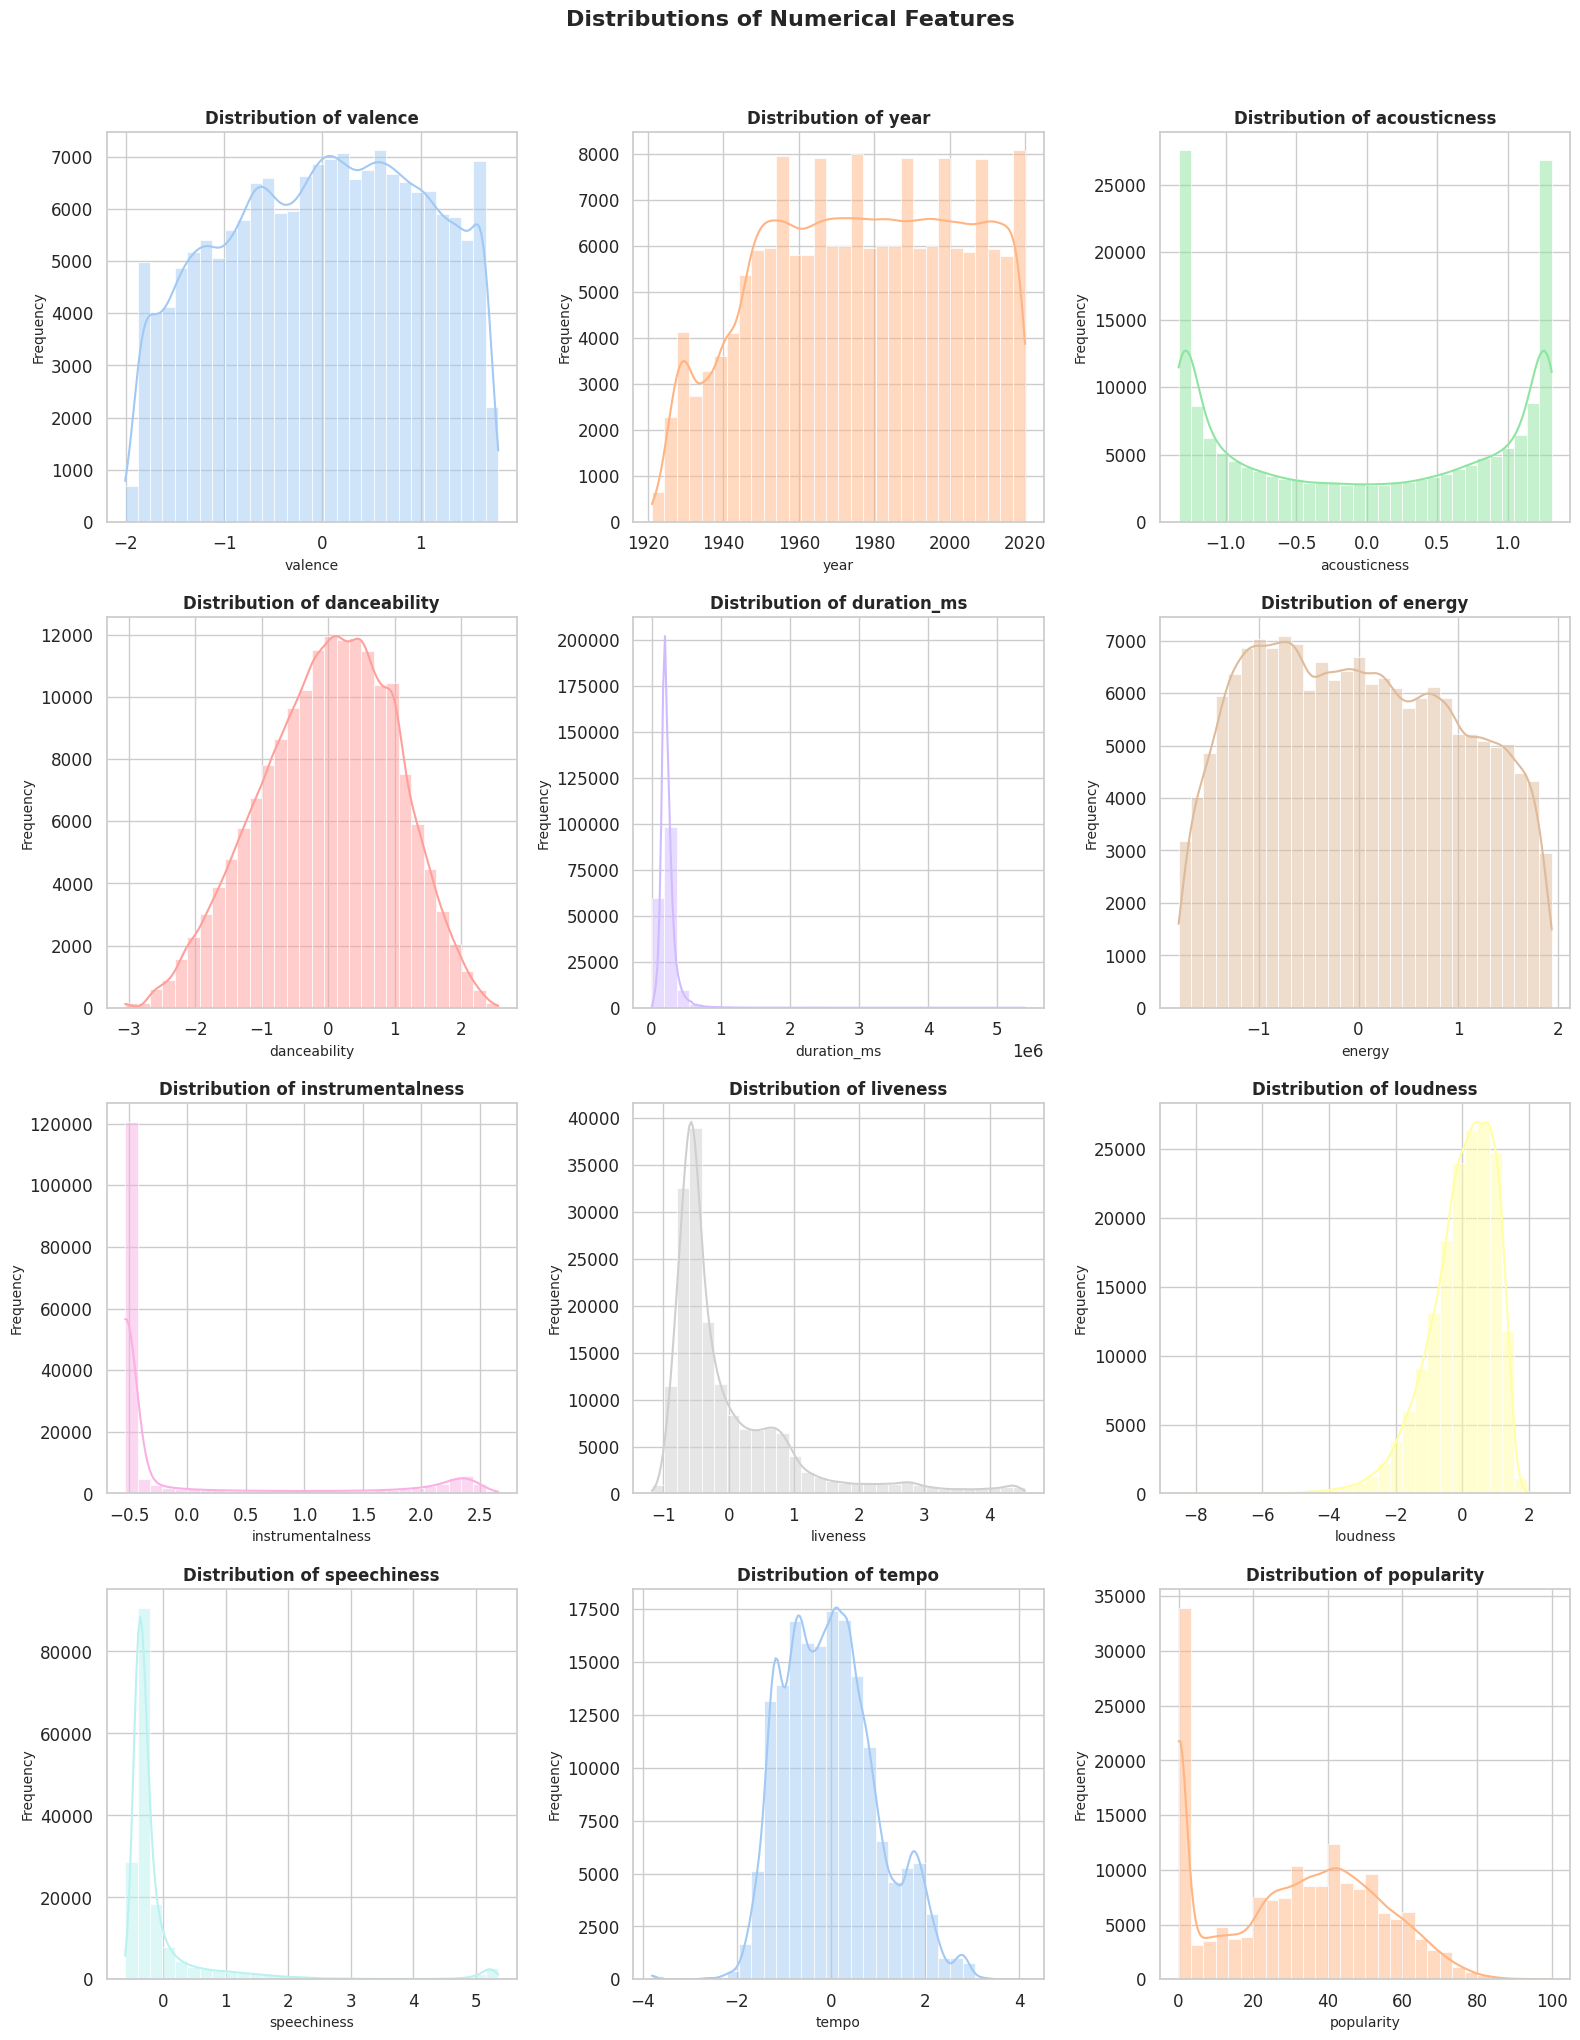

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn pastel theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

# Optional: set a global font (if supported)
plt.rcParams['font.family'] = 'DejaVu Sans'  # or try 'Verdana', 'Arial'

num_features = [
    'valence', 'year', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'popularity'
]

def plot_distributions(df, features):
    plt.figure(figsize=(16, 20))

    pastel_colors = sns.color_palette("pastel", len(features))

    for i, feature in enumerate(features):
        plt.subplot(4, 3, i + 1)
        sns.histplot(
            df[feature],
            kde=True,
            bins=30,
            color=pastel_colors[i % len(pastel_colors)],
            edgecolor='white',
            linewidth=0.5
        )
        plt.title(f"Distribution of {feature}", fontsize=12, weight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

    plt.suptitle("Distributions of Numerical Features", fontsize=16, weight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Run it
plot_distributions(data, num_features)


## Correlation Matrix + Heatmap

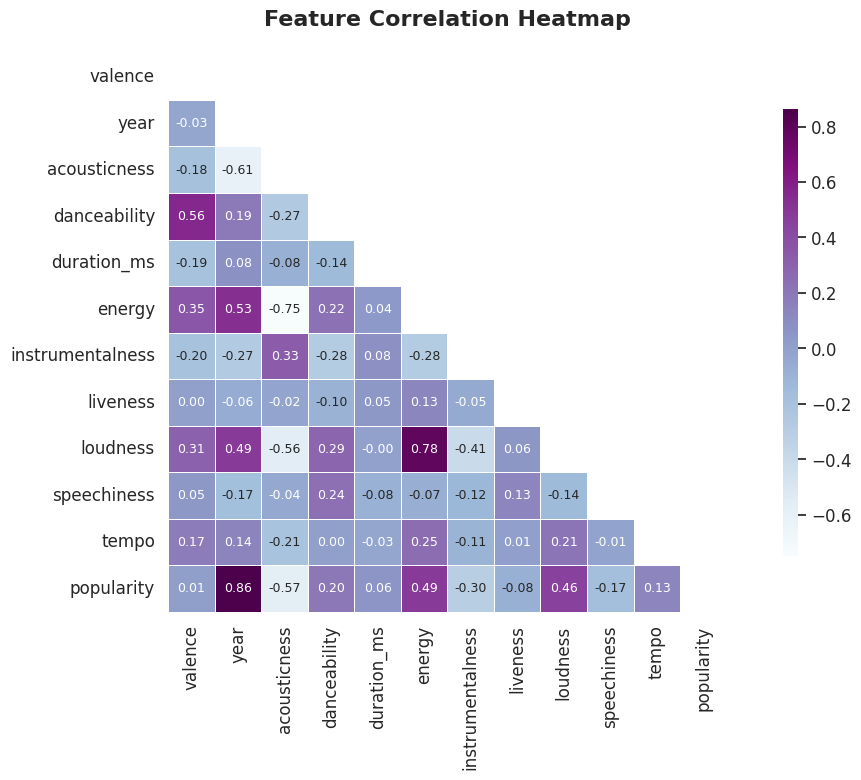

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme and font
sns.set_theme(style="white", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Compute correlation matrix
corr = data[num_features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Define a custom pastel color palette for heatmap
cmap = sns.color_palette("BuPu", as_cmap=True)  # Or try: "rocket", "mako", "YlGnBu"

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "aspect": 30},
    annot_kws={"fontsize": 9}
)

plt.title("Feature Correlation Heatmap", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()



## Categorical Feature Analysis

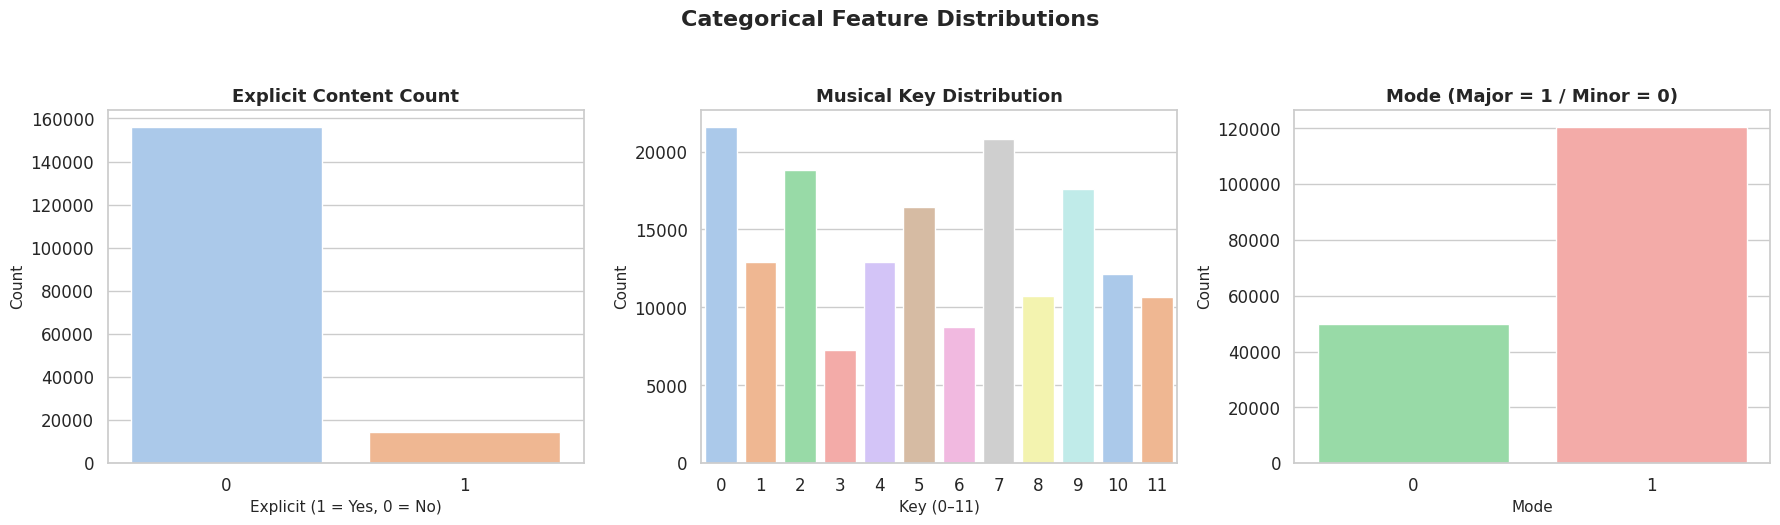

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set pastel theme
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Custom color palettes with exact number of colors
explicit_palette = sns.color_palette("pastel")[0:2]  # only 0 and 1
mode_palette = sns.color_palette("pastel")[2:4]      # only 0 and 1
key_palette = sns.color_palette("pastel", 12)        # for keys 0–11

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot: Explicit
sns.countplot(data=data, x='explicit', hue='explicit', palette=explicit_palette,
              ax=axes[0], legend=False)
axes[0].set_title("Explicit Content Count", fontsize=13, weight='bold')
axes[0].set_xlabel("Explicit (1 = Yes, 0 = No)", fontsize=11)
axes[0].set_ylabel("Count", fontsize=11)

# Plot: Key
sns.countplot(data=data, x='key', hue='key', palette=key_palette,
              ax=axes[1], legend=False)
axes[1].set_title("Musical Key Distribution", fontsize=13, weight='bold')
axes[1].set_xlabel("Key (0–11)", fontsize=11)
axes[1].set_ylabel("Count", fontsize=11)

# Plot: Mode
sns.countplot(data=data, x='mode', hue='mode', palette=mode_palette,
              ax=axes[2], legend=False)
axes[2].set_title("Mode (Major = 1 / Minor = 0)", fontsize=13, weight='bold')
axes[2].set_xlabel("Mode", fontsize=11)
axes[2].set_ylabel("Count", fontsize=11)

# Adjust layout
plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, weight='bold', y=1.05)
plt.subplots_adjust(top=0.85)
plt.show()




## Temporal Analysis — year & release_date

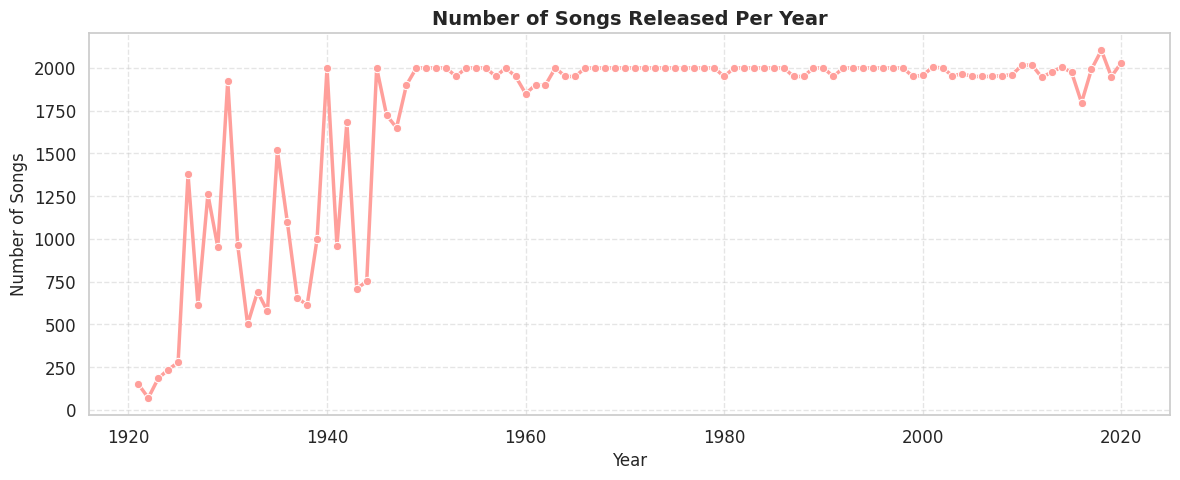

/tmp/ipython-input-182445336.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='popularity', data=data,


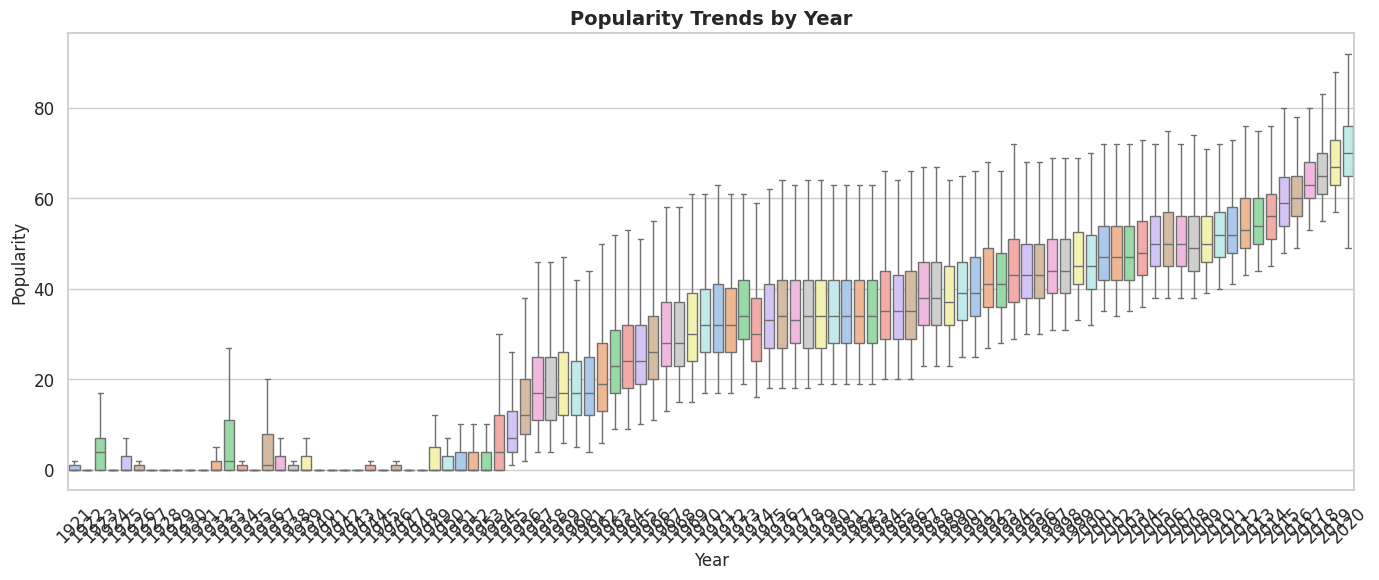

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent pastel theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

# ========== Number of Songs Released Per Year ==========
songs_per_year = data['year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values,
             linewidth=2.5, color=sns.color_palette("pastel")[3], marker='o')

plt.title("Number of Songs Released Per Year", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ==========Popularity Trends Over Time (Boxplot) ==========
plt.figure(figsize=(14, 6))
sns.boxplot(x='year', y='popularity', data=data,
            palette="pastel", showfliers=False)

plt.title("Popularity Trends by Year", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Artist & Song Popularity Exploration

### Most frequent artists:

/tmp/ipython-input-3876860438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


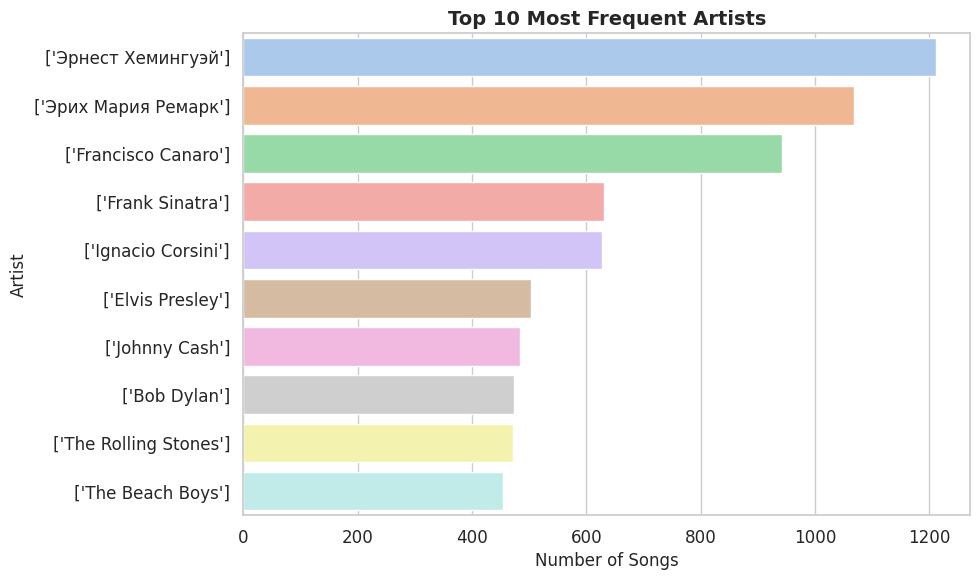

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply pastel theme
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Get top 10 artists by frequency
top_artists = data['artists'].value_counts().head(10)

# Create styled barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_artists.index,
    x=top_artists.values,
    palette="pastel"
)

plt.title("Top 10 Most Frequent Artists", fontsize=14, weight='bold')
plt.xlabel("Number of Songs", fontsize=12)
plt.ylabel("Artist", fontsize=12)
plt.tight_layout()
plt.show()


### Most popular songs:

In [16]:
top_songs = data.sort_values('popularity', ascending=False)[['name', 'artists', 'popularity']].head(10)
print(top_songs)


                                          name  \
19611                                   Dakiti   
19606                   Mood (feat. iann dior)   
19618                                 Dynamite   
19616                          Blinding Lights   
19608          WAP (feat. Megan Thee Stallion)   
19610                                positions   
19612                  What You Know Bout Love   
19615           Holy (feat. Chance The Rapper)   
19607  For The Night (feat. Lil Baby & DaBaby)   
19623                       you broke me first   

                                      artists  popularity  
19611            ['Bad Bunny', 'Jhay Cortez']         100  
19606               ['24kGoldn', 'iann dior']          99  
19618                                 ['BTS']          97  
19616                          ['The Weeknd']          96  
19608      ['Cardi B', 'Megan Thee Stallion']          96  
19610                       ['Ariana Grande']          96  
19612                        

## Advanced EDA: Relationships Between Features

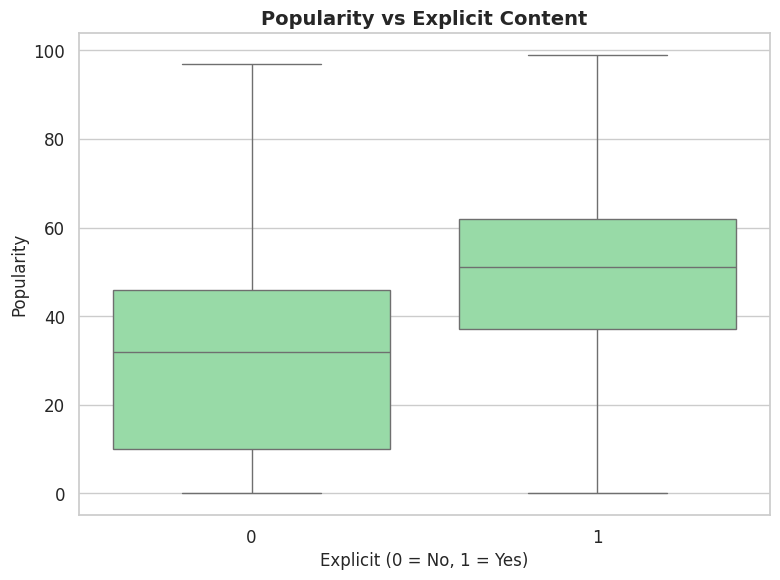

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastel theme
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Choose a pastel color for the boxes
box_color = sns.color_palette("pastel")[2]

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='explicit',
    y='popularity',
    data=data,
    color=box_color,   # Use color instead of palette to avoid warning
    showfliers=False   # Optional: hide outliers for cleaner look
)

plt.title("Popularity vs Explicit Content", fontsize=14, weight='bold')
plt.xlabel("Explicit (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.tight_layout()
plt.show()


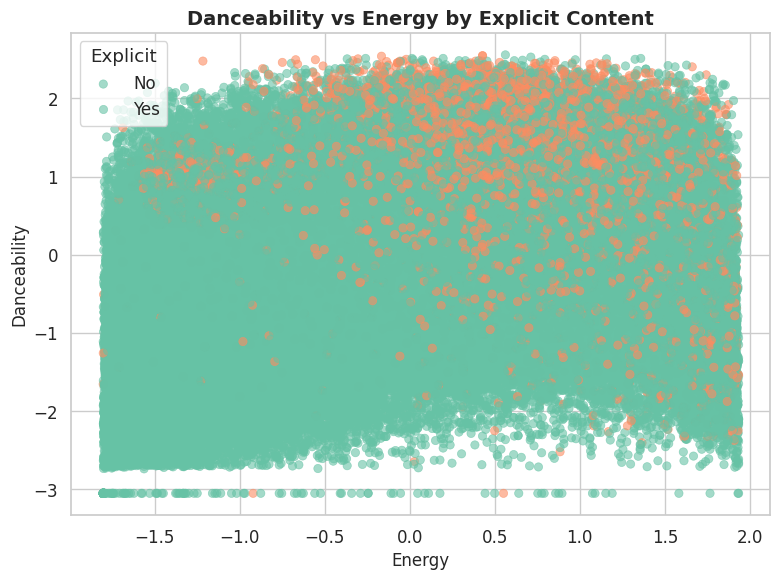

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Define palette for 2 classes
explicit_palette = sns.color_palette("Set2", 2)  # pastel-friendly alternative

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='energy',
    y='danceability',
    hue='explicit',
    palette=explicit_palette,
    alpha=0.6,
    edgecolor=None
)

plt.title("Danceability vs Energy by Explicit Content", fontsize=14, weight='bold')
plt.xlabel("Energy", fontsize=12)
plt.ylabel("Danceability", fontsize=12)
plt.legend(title="Explicit", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


# Data Understanding

In [20]:
import plotly.express as px
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [21]:
genre_data.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

### Prepare the Data: Characteristics of Different Genres

In [22]:
# Features to analyze
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy',
                'instrumentalness', 'liveness', 'loudness', 'speechiness',
                'tempo', 'valence', 'popularity']

categorical_features = ['mode', 'key', 'genres']

genre_data.head()


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


### Average Feature Values per Genre

In [23]:
# Compute average numerical features per genre
genre_avg = genre_data.groupby('genres')[num_features].mean().reset_index()
genre_avg.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


### Radar (Spider) Chart for Selected Features

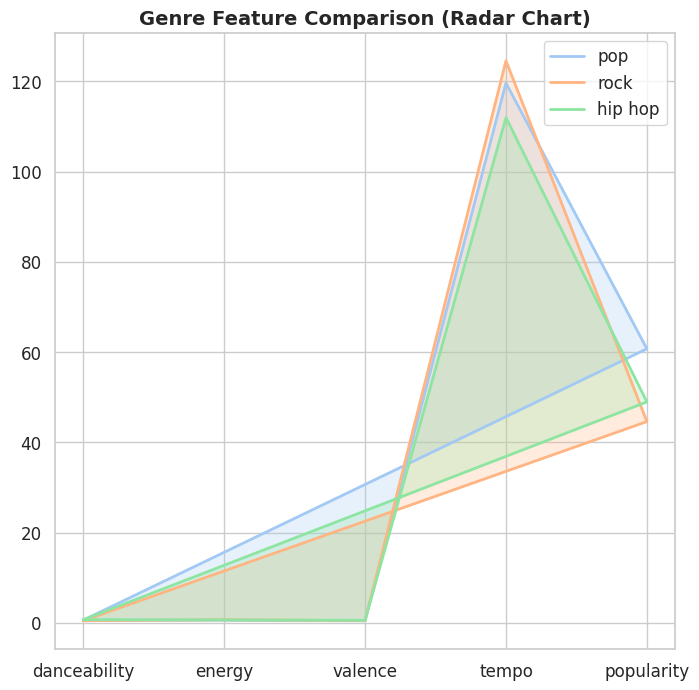

In [24]:
features = ['danceability','energy','valence','tempo','popularity']
genres_to_plot = ['pop','rock','hip hop']  # example

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(8, 8))

for genre in genres_to_plot:
    values = genre_avg[genre_avg['genres']==genre][features].values.flatten().tolist()
    values += values[:1]
    plt.plot(angles, values, label=genre, linewidth=2)
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], features)
plt.title("Genre Feature Comparison (Radar Chart)", fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.show()



### Pairplot / Scatterplot Matrix for Top Genres

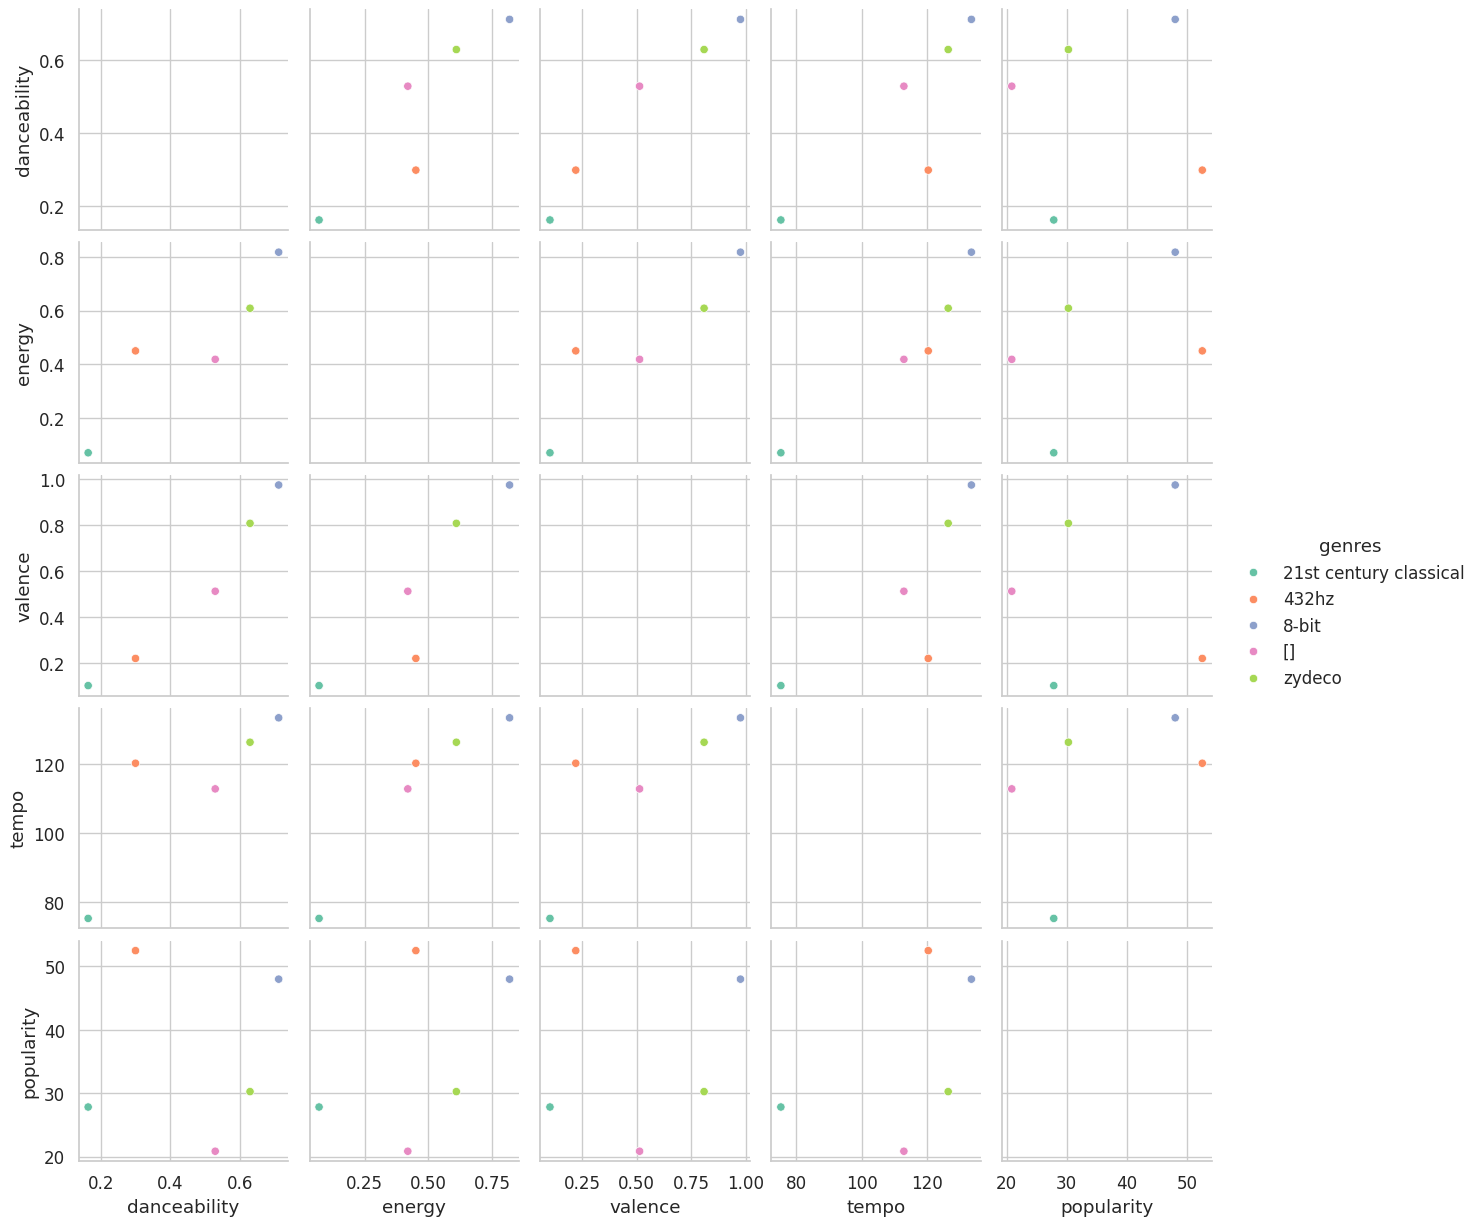

In [25]:
top_genres = genre_avg['genres'].value_counts().head(5).index

sns.pairplot(
    genre_data[genre_data['genres'].isin(top_genres)],
    vars=['danceability', 'energy', 'valence', 'tempo', 'popularity'],
    hue='genres',
    palette='Set2',
    diag_kind='kde'
)

# Feature Engineering

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

## Handle release_date

In [27]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year.fillna(0).astype(int)
data['month'] = data['release_date'].dt.month.fillna(0).astype(int)
data['decade'] = (data['year'] // 10) * 10
data['decade'] = data['decade'].replace(0, np.nan)  # optional: handle missing years

## Encode Categorical Features

In [28]:
decade_encoded = pd.get_dummies(data['decade'], prefix='decade', dummy_na=True)
data = pd.concat([data, decade_encoded], axis=1)
data = data.drop(columns=['decade'])


In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode each artist as an integer
le = LabelEncoder()
data['artist_encoded'] = le.fit_transform(data['artists'])
data = data.drop(columns=['artists'])


## Scale numerical features

In [34]:
from sklearn.preprocessing import StandardScaler

num_features = ['valence','acousticness','danceability','duration_ms','energy',
                'instrumentalness','liveness','loudness','speechiness','tempo',
                'popularity','year','month','explicit','mode','key']

scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

# -----------------------------
# Step 4: Keep 'name' as identifier
# -----------------------------
song_names = data['name']

# Optional: drop 'name' and 'release_date' from features for modeling
data_features = data.drop(columns=['name','release_date'])


# build a Content-Based Music Recommendation System

## Create Feature Matrix

In [35]:
# Feature matrix for similarity computation
X = data_features  # data_features is your preprocessed dataframe


## Approximate Nearest Neighbors

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nn_model = NearestNeighbors(n_neighbors=10+1, metric='cosine', algorithm='auto')
nn_model.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=11)

In [37]:
def recommend_songs_nn(song_name, data, feature_matrix, nn_model, top_n=10):
    # Find song index
    try:
        idx = data[data['name'] == song_name].index[0]
    except IndexError:
        return f"Song '{song_name}' not found."

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors([feature_matrix.iloc[idx]], n_neighbors=top_n+1)
    top_indices = indices.flatten()[1:top_n+1]  # exclude itself

    # Return song names, artist_encoded, popularity
    return data.iloc[top_indices][['name','artist_encoded','popularity']]


In [38]:
artist_mapping = dict(zip(le.transform(le.classes_), le.classes_))
recommended_songs = recommend_songs_nn("Shape of You", data, X, nn_model, top_n=5)
recommended_songs['artist_name'] = recommended_songs['artist_encoded'].map(artist_mapping)
recommended_songs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,artist_encoded,popularity,artist_name
74616,Shape of You,8475,1.904479,['Ed Sheeran']
140675,Vampire,7875,1.675400,['Dominic Fike']
124828,4K,8650,2.133558,"['El Alfa', 'Darell', 'Noriel']"
108365,Adictiva,6736,1.767032,"['Daddy Yankee', 'Anuel AA']"
108074,What Do I Know?,8475,1.721216,['Ed Sheeran']


# Test the Recommendation Function

In [39]:
recommend_songs_nn("Shape of You", data, data_features, nn_model, top_n=5)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,artist_encoded,popularity
74616,Shape of You,8475,1.904479
140675,Vampire,7875,1.675400
124828,4K,8650,2.133558
108365,Adictiva,6736,1.767032
108074,What Do I Know?,8475,1.721216


# Test the Recommendation Function

In [40]:
weights = {
    'danceability': 2.0,
    'energy': 1.5,
    'valence': 1.0,
    'tempo': 0.5,
    'popularity': 1.2
}

X_weighted = X.copy()
for feature, weight in weights.items():
    if feature in X_weighted.columns:
        X_weighted[feature] *= weight

# Refit NearestNeighbors with weighted features
nn_model.fit(X_weighted)


NearestNeighbors(metric='cosine', n_neighbors=11)

In [45]:
recommended_songs = recommend_songs_nn("Shape of You", data, X_weighted, nn_model, top_n=5)
recommended_songs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,artist_encoded,popularity
74616,Shape of You,8475,1.904479
140675,Vampire,7875,1.675400
108074,What Do I Know?,8475,1.721216
16235,Dile,7920,1.996110
17216,Walking On A Dream,8972,2.041926


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

query_idx = data[data['name']=="Shape of You"].index[0]
query_vec = X_weighted.iloc[query_idx].values.reshape(1, -1)

# Similarity between query and all songs
sim_scores = cosine_similarity(query_vec, X_weighted).flatten()

# Get top N indices (excluding itself)
top_indices = sim_scores.argsort()[::-1][1:6]
top_scores = sim_scores[top_indices]

recommended_songs_with_score = data.iloc[top_indices][['name','artist_encoded','popularity']].copy()
recommended_songs_with_score['similarity'] = top_scores
recommended_songs_with_score


,name,artist_encoded,popularity,similarity
74616,Shape of You,8475,1.904479,1.0
140675,Vampire,7875,1.675400,1.0
108074,What Do I Know?,8475,1.721216,1.0
16235,Dile,7920,1.996110,1.0
17216,Walking On A Dream,8972,2.041926,1.0


# Metrics

## Average similarity of top-N recommendations

In [47]:
avg_similarity = recommended_songs_with_score['similarity'].mean()
print("Average similarity of top-5 recommendations:", avg_similarity)


Average similarity of top-5 recommendations: 0.9999999800657013


## Popularity bias check

In [49]:
popularity_avg = recommended_songs_with_score['popularity'].mean()
print("Average popularity of top-5 recommendations:", popularity_avg)


Average popularity of top-5 recommendations: 1.867826268302839


# Integrate an LLM

## Setup

In [ ]:
pip install sentence-transformers scikit-learn pandas numpy faiss-cpu


## Prepare Data

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   valence           170653 non-null  float64       
 1   year              170653 non-null  float64       
 2   acousticness      170653 non-null  float64       
 3   danceability      170653 non-null  float64       
 4   duration_ms       170653 non-null  float64       
 5   energy            170653 non-null  float64       
 6   explicit          170653 non-null  float64       
 7   instrumentalness  170653 non-null  float64       
 8   key               170653 non-null  float64       
 9   liveness          170653 non-null  float64       
 10  loudness          170653 non-null  float64       
 11  mode              170653 non-null  float64       
 12  name              170653 non-null  object        
 13  popularity        170653 non-null  float64       
 14  rele

In [54]:
numeric_features = [
    'valence', 'year', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'explicit', 'instrumentalness', 'key', 'liveness',
    'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'month'
]


In [55]:
data['song_text'] = data['name'] + " by " + data['artist_encoded'].astype(str)


## Compute LLM Text Embeddings

In [56]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode song title + artist
song_embeddings = model.encode(data['song_text'].tolist(), show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5333 [00:00<?, ?it/s]

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numeric = scaler.fit_transform(data[numeric_features + ['artist_encoded']])


## Combine Audio + Text Features

In [58]:
import numpy as np

# Assign weights
weight_audio = 0.7
weight_text = 0.3

X_combined = np.hstack([X_numeric * weight_audio, song_embeddings * weight_text])


## Fit Nearest Neighbors

In [59]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='auto')
nn_model.fit(X_combined)


NearestNeighbors(metric='cosine', n_neighbors=11)

## Recommendation Function

In [60]:
def recommend_songs_hybrid(song_name, data, feature_matrix, nn_model, top_n=10):
    try:
        idx = data[data['name'] == song_name].index[0]
    except IndexError:
        return f"Song '{song_name}' not found."

    distances, indices = nn_model.kneighbors([feature_matrix[idx]], n_neighbors=top_n+1)
    top_indices = indices.flatten()[1:top_n+1]

    return data.iloc[top_indices][['name','artist_encoded','popularity']]


## Map Encoded Artists Back

In [61]:
artist_mapping = {encoded: original_name for encoded, original_name in zip(data['artist_encoded'], data['artist_encoded'])}  # replace with real mapping
recommended_songs = recommend_songs_hybrid("Shape of You", data, X_combined, nn_model, top_n=5)
recommended_songs['artist_name'] = recommended_songs['artist_encoded'].map(artist_mapping)
recommended_songs


,name,artist_encoded,popularity,artist_name
74616,Shape of You,8475,1.904479,8475
140550,On the Low,4567,1.904479,4567
90696,Baby I'm Yours,4304,1.767032,4304
140675,Vampire,7875,1.675400,7875
74703,How Long,5440,1.904479,5440


## Evaluation Metrics

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

query_idx = data[data['name']=="Shape of You"].index[0]
query_vec = X_combined[query_idx].reshape(1, -1)
sim_scores = cosine_similarity(query_vec, X_combined).flatten()
top_indices = sim_scores.argsort()[::-1][1:6]
data.iloc[top_indices][['name','artist_encoded','popularity']]


,name,artist_encoded,popularity
74616,Shape of You,8475,1.904479
140550,On the Low,4567,1.904479
90696,Baby I'm Yours,4304,1.767032
140675,Vampire,7875,1.675400
74703,How Long,5440,1.904479
